In [1]:
#Import das bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LEitura do arquivo csv (dataframe completo)
df = pd.read_csv("D:\Eu\Programar\Data Science\ENEM\Resumido\MICRODADOS_ENEM_2023.csv", sep = ";", encoding='ISO-8859-1')

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\gabri\AppData\Local\Temp\ipykernel_14384\2285860001.py:2: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\Eu\Programar\Data Science\ENEM\Resumido\MICRODADOS_ENEM_2023.csv", sep = ";", encoding='ISO-8859-1')


In [3]:
#Seleção das colunas de ineresse
colunas = ['NU_INSCRICAO', 'SG_UF_ESC','TP_FAIXA_ETARIA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO',
       'NU_NOTA_MT', 'TX_RESPOSTAS_MT', 'TX_GABARITO_MT', 'TP_PRESENCA_MT', 'Q001', 'Q002', 'Q006']

In [4]:
#Filtra as colunas de interesse e remove as linhas com valores faltantes (NaN)
df_red = df.filter(items=colunas)
df_red = df_red.dropna()


In [5]:
#Sorteia 150.000 linhas aleatórias para formar um dataset reduzido e salva um novo arquivo
df_reduzido = df_red.sample(150000)
df_reduzido.to_csv('df_reduzido.csv', index=False)

### Distribuição de Idade

In [6]:
#Agora podemos visualizar algumas informações básicas, por exemplo, a distribuição de idade.
#Para isso, selecionamos a coluna e aplicamos a função 'value_counts', seguido de um sort_index, e então podemos ver a quantidade de pessoas
# em cada faixa etária

df_idade = df_reduzido['TP_FAIXA_ETARIA']

In [7]:
df_idade.value_counts().sort_index

<bound method Series.sort_index of TP_FAIXA_ETARIA
3     75219
2     59263
4      9846
5      2247
1      1129
6       659
11      282
7       234
12      196
13      191
8       158
9       128
14      117
10       96
16       85
15       77
17       40
18       17
19       12
20        4
Name: count, dtype: int64>

Text(23.5, 800.0, 'Faixa Etária')

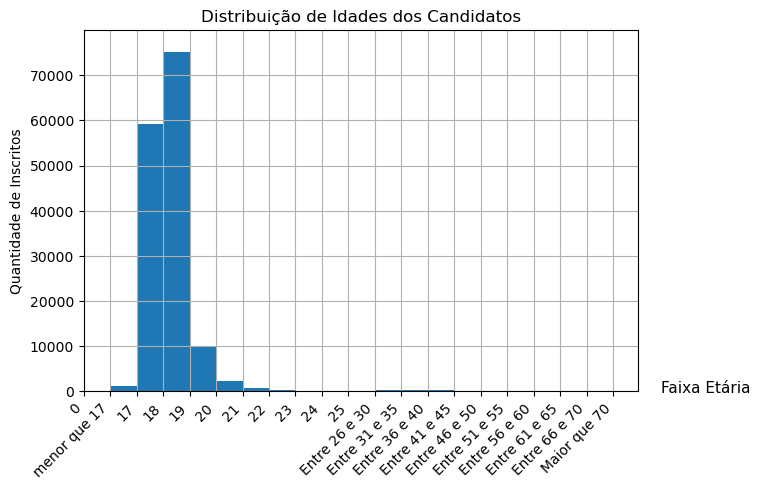

In [8]:
#Par uma melhor visualização, vamos criar um histograma
#Como vimos no dicionario, cada valor na coluna 'TP_FAIXA_ETARIA' representa um valor, ou um range de valores
#Para uma melhor leitura, podemos mudar a legenda do eixo X e inserir a idade (ou faixa etária) representada.

df_idade.hist(bins=19)
labels = ["0", "menor que 17", "17", "18", "19", "20", "21", "22", "23", "24", "25", "Entre 26 e 30", "Entre 31 e 35", "Entre 36 e 40", "Entre 41 e 45", "Entre 46 e 50", "Entre 51 e 55", "Entre 56 e 60", "Entre 61 e 65", "Entre 66 e 70", "Maior que 70"]
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45, ha = 'right')
plt.tight_layout()
plt.ylim(0, 80000)
plt.yticks(np.arange(0, 80000, 10000))

plt.ylabel('Quantidade de Inscritos')
plt.title('Distribuição de Idades dos Candidatos')

#TItulo eixo X (Usualmente o título do eixo fica abaixo do eixo, como mudamos os rótulos do eixo X, mudamos a legenda de local para não sobrepor)
plt.text(
    x=23.5,  # Posição X no final dos rótulos
    y=800000 * 0.001,  # Posição Y um pouco abaixo do eixo x
    s='Faixa Etária',  # Texto do título
    ha='center',       # Alinhamento horizontal
    va='center',       # Alinhamento vertical
    fontsize=11,       # Tamanho da fonte
    #weight='bold'      # Peso da fonte
)

### Distribuição por estado

Text(0.5, 1.0, 'Distribuição dos Candidatos por Estado')

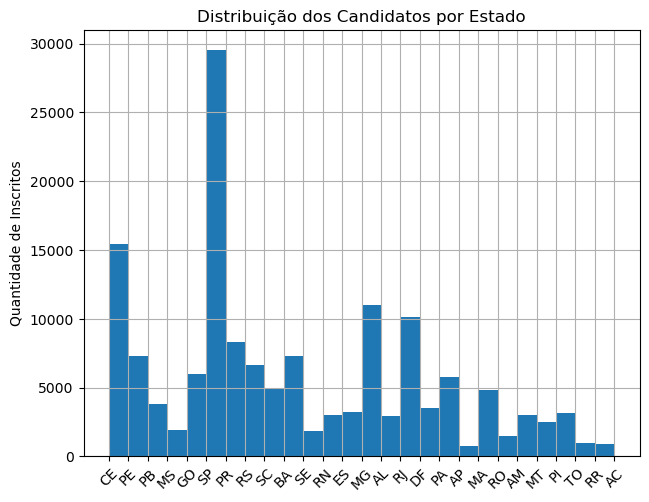

In [9]:
#Analogamente podemos observar a distribuição por estado


df_estado = df_reduzido['SG_UF_ESC']
df_estado.value_counts();
df_estado.hist(bins=26);
plt.tight_layout();
plt.xticks(rotation=45);
plt.ylabel('Quantidade de Inscritos')
plt.title('Distribuição dos Candidatos por Estado')

### Notas e Acertos

In [10]:
# O método de correção do ENEM é baseado na metodologia TRI (Teoria de resposta ao item), resumidamente, essa metodologia busca representar a relação entre a 
#probabilidade de o participante responder corretamente a uma questão, considerando a particularidade de cada questão. Ou seja, duas pessoas com o mesmo número de acertos numa prova
#podem ter notas diferentes, pois depende de quais questões foram acertadas.
#Podemos ver esse efeito graficamente.


colunas_acertos = ['TP_PRESENCA_MT', 'NU_NOTA_MT', 'TX_RESPOSTAS_MT','TX_GABARITO_MT']
df_acertos=df_reduzido.filter(items=colunas_acertos)

In [11]:
#Selecionamos apenas os alunos que comparecerem na prova
df_MT = df_acertos[df_acertos.TP_PRESENCA_MT==1]

In [12]:
#No datframe original temos a nota final, um vetor com as respostas do candidato e um vetor gabarito, mas não há uma coluna contendo o número de acertos.
#Assim, teremos que criar essa coluna por nossa conta.
#Vamos criar uma função que compara dois vetores (respostas e gabarito), mas primeiro vamos passar todos os valores para string e depois iterar sequencialmente os caracteres dos dois vetores e gerar um contador que soma 1 quando os valores são iguais.


def contar_acertos(vetor1, vetor2):
    str_valor1 = str(vetor1)
    str_valor2 = str(vetor2)

    i=0
    for char1, char2 in zip(str_valor1, str_valor2):
        if char1 == char2:
            i += 1
    return i


In [13]:
#Com a função feita, aplicamos a função no nosso dataset
df_MT['NU_ACERTOS'] = df.apply(lambda row: contar_acertos(row['TX_GABARITO_MT'], row['TX_RESPOSTAS_MT']), axis=1)

Text(0.5, 1.0, 'Nota X Acertos')

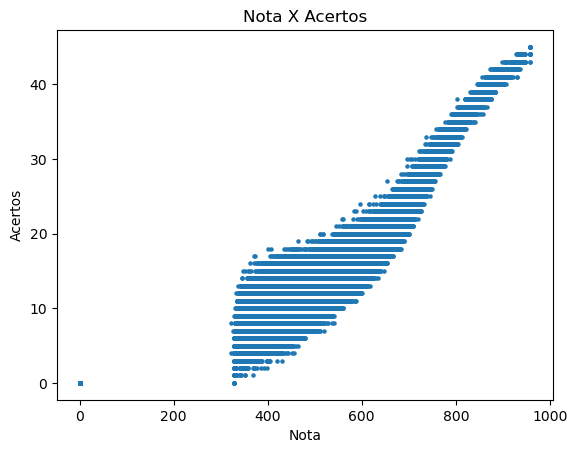

In [14]:
# E então observamos a distribuição. Observa-se que de fato a distribuilção não é linear, sendo que até em torno de 25 questões acertadas a nota pode variar bastante
plt.scatter(df_MT['NU_NOTA_MT'], df_MT['NU_ACERTOS'], marker='o', s=5)
plt.xlabel('Nota')
plt.ylabel('Acertos')
plt.title('Nota X Acertos')

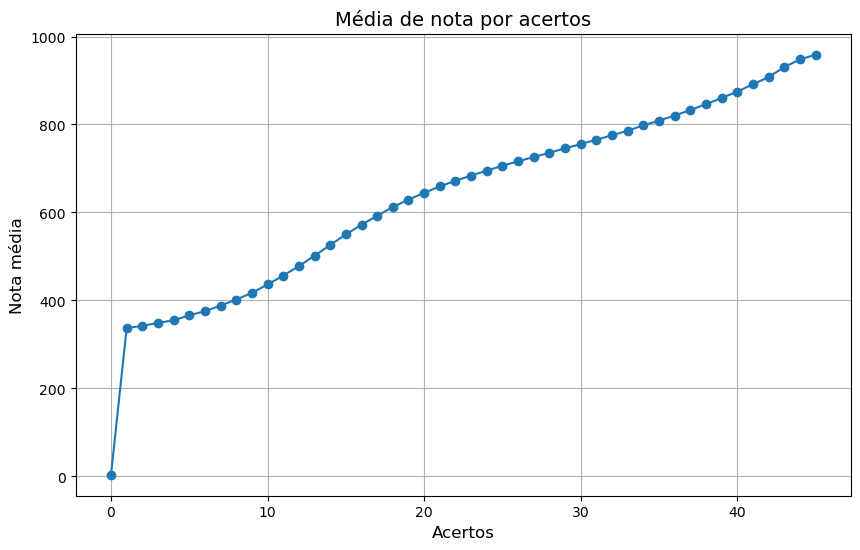

In [15]:
#Porém, se observamos a média de notas por acertos, observamos uma tendência quase linear dos acertos para as notas.

df_media = df_MT.filter(items=['NU_NOTA_MT', 'NU_ACERTOS']).groupby('NU_ACERTOS').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_media.index, df_media['NU_NOTA_MT'], marker='o')

plt.title('Média de nota por acertos', fontsize=14)
plt.xlabel('Acertos', fontsize=12)
plt.ylabel('Nota média', fontsize=12)
plt.grid(True)


### Nota Redação por competência

In [16]:
#A correção da redação é dividida em 5 competências, será que as notas são distribuídas igualmente entre elas?

notas_comp = ['TP_STATUS_REDACAO','NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']

df_notas_competencia = df.filter(items = notas_comp)
df_comp=df_notas_competencia[df_notas_competencia.TP_STATUS_REDACAO==1]

In [17]:

df_comp1=df_comp['NU_NOTA_COMP1']
df_comp2=df_comp['NU_NOTA_COMP2']
df_comp3=df_comp['NU_NOTA_COMP3']
df_comp4=df_comp['NU_NOTA_COMP4']
df_comp5=df_comp['NU_NOTA_COMP5']

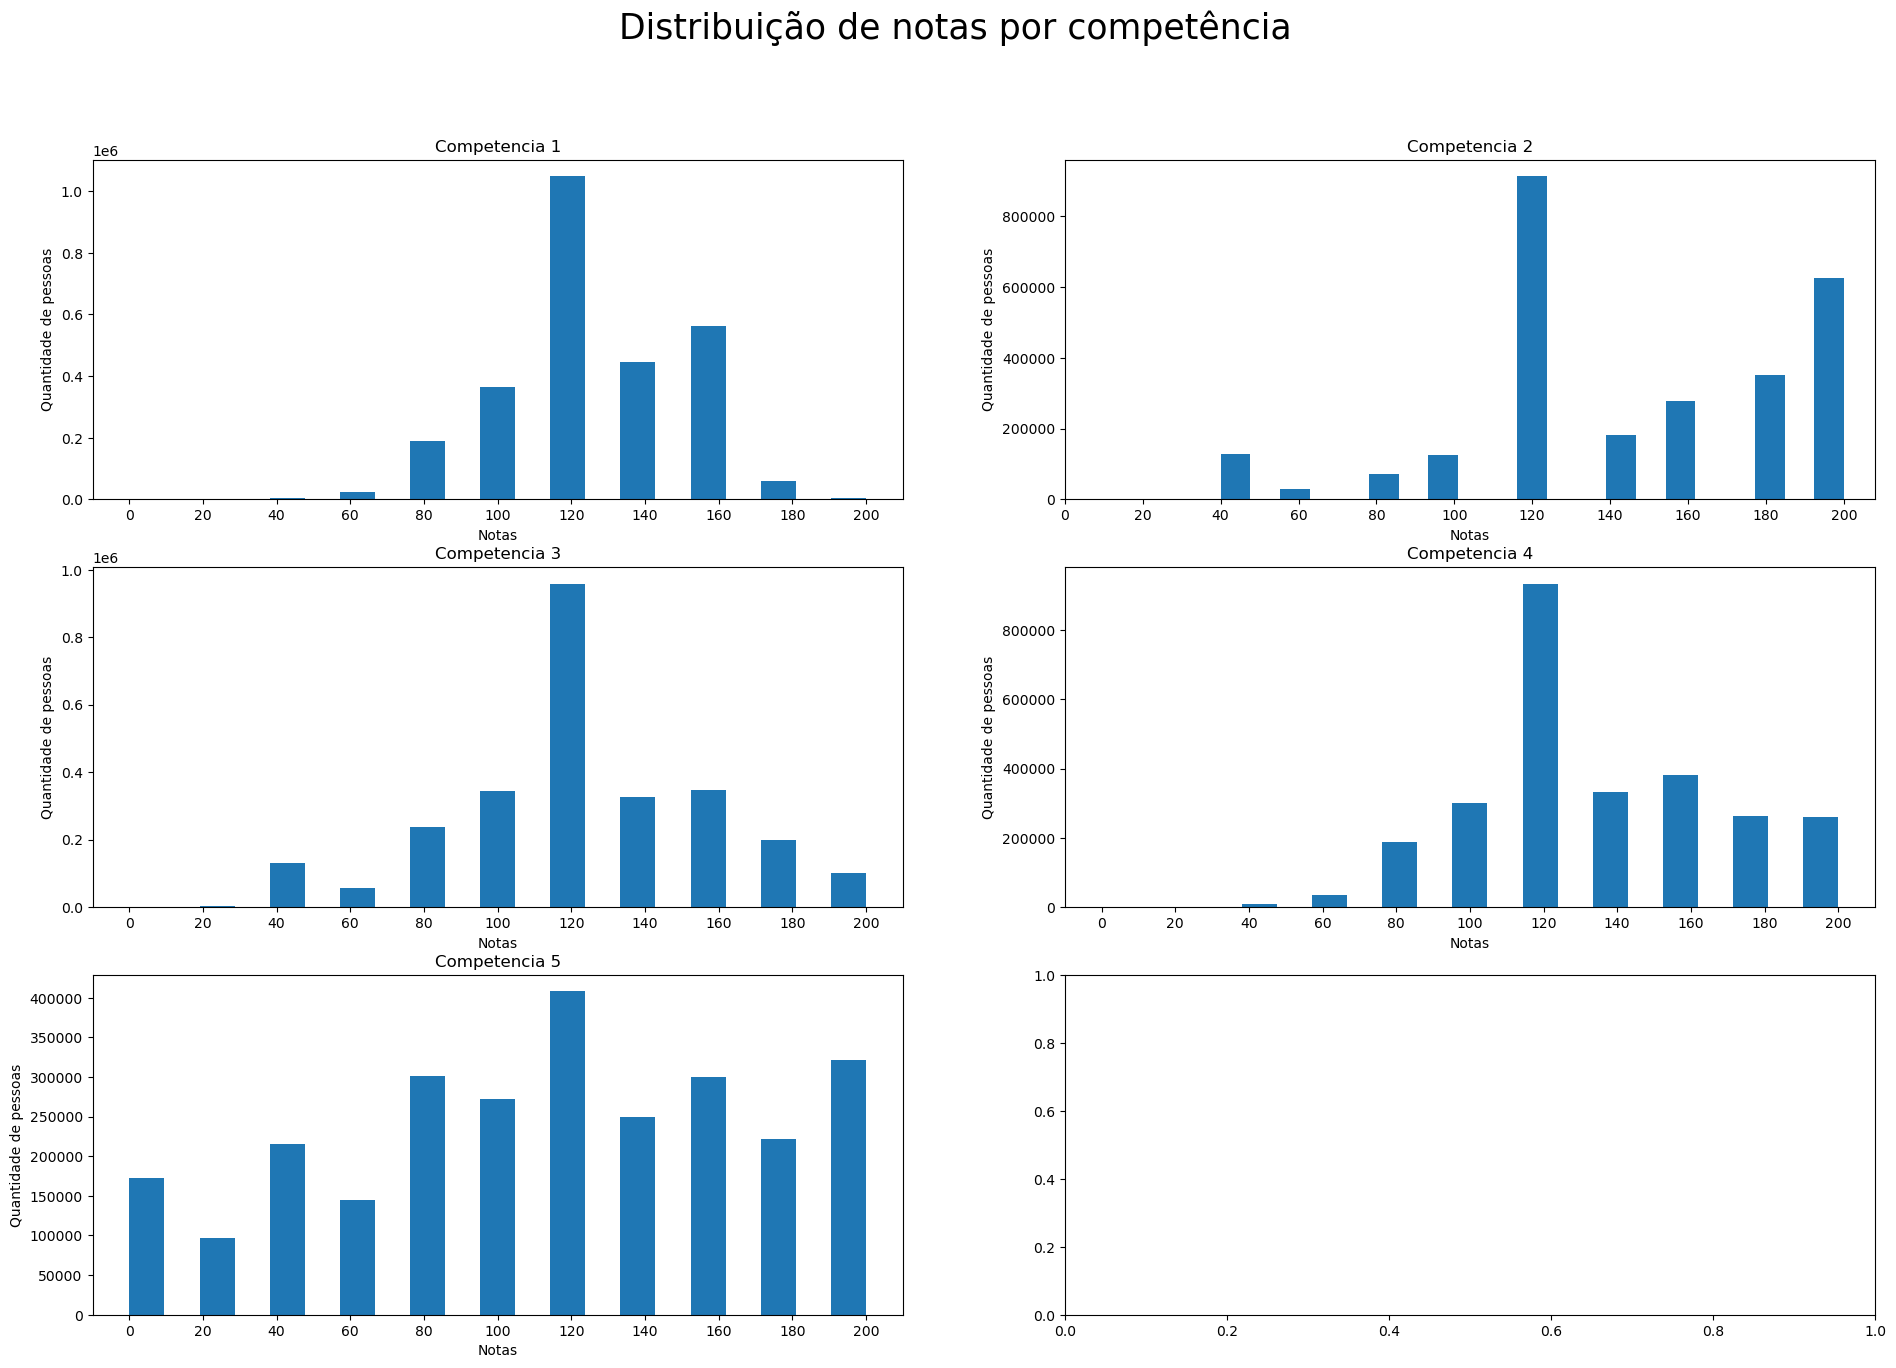

In [18]:
intervalo = np.arange(0,201,20)
fig1, f1_axes = plt.subplots(ncols=2, nrows=3, figsize=(23,15))
fig1.suptitle("Distribuição de notas por competência", size=25)

f1_axes[0,0].hist(df_comp1, bins=21)
f1_axes[0,0].set_title("Competencia 1")
f1_axes[0,0].set_xlabel ("Notas")
f1_axes[0,0].set_ylabel ("Quantidade de pessoas")
f1_axes[0,0].set_xticks(intervalo)

f1_axes[0,1].hist(df_comp2, bins=21)
f1_axes[0,1].set_title("Competencia 2")
f1_axes[0,1].set_xlabel ("Notas")
f1_axes[0,1].set_ylabel ("Quantidade de pessoas")
f1_axes[0,1].set_xticks(intervalo)

f1_axes[1,0].hist(df_comp3, bins=21)
f1_axes[1,0].set_title("Competencia 3")
f1_axes[1,0].set_xlabel ("Notas")
f1_axes[1,0].set_ylabel ("Quantidade de pessoas")
f1_axes[1,0].set_xticks(intervalo)

f1_axes[1,1].hist(df_comp4, bins=21)
f1_axes[1,1].set_title("Competencia 4")
f1_axes[1,1].set_xlabel ("Notas")
f1_axes[1,1].set_ylabel ("Quantidade de pessoas")
f1_axes[1,1].set_xticks(intervalo)

f1_axes[2,0].hist(df_comp5, bins=21)
f1_axes[2,0].set_title("Competencia 5")
f1_axes[2,0].set_xlabel ("Notas")
f1_axes[2,0].set_ylabel ("Quantidade de pessoas")
f1_axes[2,0].set_xticks(intervalo)

In [19]:
#Observando os gráficos, a competência 5 é a que mais destoa das outras por não estar tão centrada em 120, tendo uma distribuição maior de outras notas.
#Esta competencia trata das propostas de intervenção para o problema abordado no tema, neste caso podemos pensar que há uma distribuição
#melhor de notas pois isso leva em conta mais conhecimentos gerais e de como resolver um problema do que conhecimento formal da linguagem em si.
#Ainda sim, gostaria muito de conversar com um corretor a respeito disso.


#Para conferir os gráficos podemos ver a distribuição de nota para cada competência

df_comp1.value_counts().sort_index

<bound method Series.sort_index of NU_NOTA_COMP1
120.0    1049425
160.0     561001
140.0     446453
100.0     364300
80.0      188382
180.0      60381
60.0       24388
40.0        5954
200.0       4039
20.0         285
0.0          206
Name: count, dtype: int64>

### Nota Redação e Escolaridade dos pais

In [20]:
#Além disso, podemos observar se há uma tendência entre a escolatidade dos pais e a nota da redação.
#a Q001 fala sobre a escolaridade do pai ou homem responsável
#a Q002 fala sobre a escolaridade do mãe ou mulher responsável
#a Q006 fala sobre a renda mensal familiar (somndo todas as pessoas da residencia)

col_familia = ['NU_INSCRICAO','NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006']
df_familia = df_reduzido.filter(col_familia)

In [21]:
#Nas questões perguntando sobre a educação dos pais, os dados estão codificados, como mostrado a seguir:

dicionaria_1e2 = {'A': 'Nunca Estudou',
                  'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
                  'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
                   'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'}              

In [22]:
#Quando fazemos um agrupamento para observar a quantidade de cada resposta, a visualização não é agradável.

df_familia.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,3357
B,16391
C,16860
D,17525
E,47881
F,17736
G,14681
H,15569


In [23]:
#Podemos mudar isso colocando a resposta da pergunta ao invés da codificação, assim melhoramos o entendimento.

df_familia['Q_Q001'] = [dicionaria_1e2[resp] for resp in df_familia.Q001]
df_familia.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q_Q001
1491447,210058867461,900.0,D,F,O,Completou a 8ª série/9º ano do Ensino Fundamen...
2833942,210061363040,640.0,H,H,B,Não sei
1868403,210058682793,780.0,E,E,H,"Completou o Ensino Médio, mas não completou a ..."
3458995,210059683530,660.0,E,E,E,"Completou o Ensino Médio, mas não completou a ..."
2713211,210058683942,540.0,E,F,B,"Completou o Ensino Médio, mas não completou a ..."


In [24]:
#Podemos agrupar e ordenar para aparecer em ordem decrescente. E observamos que par a maior parte dos candidatos o pai completou o ensino médio mas não a faculdade

df_familia.filter(items=['Q_Q001', 'NU_INSCRICAO']).groupby('Q_Q001').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Q_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",47881
"Completou a Faculdade, mas não completou a Pós-graduação",17736
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",17525
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",16860
Não completou a 4ª série/5º ano do Ensino Fundamental,16391
Não sei,15569
Completou a Pós-graduação,14681
Nunca Estudou,3357


In [25]:
#A mesma tendência é observado para as mães, porém observamos uma maior quantidade de mulheres que terminaram a pós graduação quando comparado aos homens.

df_familia['Q_Q002'] = [dicionaria_1e2[resp] for resp in df_familia.Q002]
df_familia.filter(items=['Q_Q002', 'NU_INSCRICAO']).groupby('Q_Q002').count().sort_values(by='NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Q_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",55447
Completou a Pós-graduação,23588
"Completou a Faculdade, mas não completou a Pós-graduação",22973
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",17127
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",12764
Não completou a 4ª série/5º ano do Ensino Fundamental,10276
Não sei,6061
Nunca Estudou,1764


In [26]:
#Podemos agrupar essa escolaridade dos pais com a nota média da redção de cada estrato
#E a partir da tabela já podemos visualizar uam tendência de que quanto maior a escolaridade dos pais, maior a nota da redação.

df_familia.filter(items=['Q_Q001', 'NU_NOTA_REDACAO']).groupby('Q_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
Q_Q001,
Completou a Pós-graduação,760.126694
"Completou a Faculdade, mas não completou a Pós-graduação",733.986243
"Completou o Ensino Médio, mas não completou a Faculdade",658.989161
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",617.731241
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",603.669039
Não completou a 4ª série/5º ano do Ensino Fundamental,570.162894
Não sei,563.659837
Nunca Estudou,519.356568


In [27]:
#Com o comando describe() podemos ver uma descrição melhor até mesmo do agrupamento como um todo.

df_familia.filter(items=['Q_Q001','NU_NOTA_REDACAO']).groupby('Q_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
Q_Q001                                                               
Completou a 4ª série/5º ano, mas não completou ...         16860.0   
Completou a 8ª série/9º ano do Ensino Fundament...         17525.0   
Completou a Faculdade, mas não completou a Pós-...         17736.0   
Completou a Pós-graduação                                  14681.0   
Completou o Ensino Médio, mas não completou a F...         47881.0   
Nunca Estudou                                               3357.0   
Não completou a 4ª série/5º ano do Ensino Funda...         16391.0   
Não sei                                                    15569.0   

                                                                            \
                                                          mean         std   
Q_Q001                                                                       
Completou a 4ª série/5º ano, mas não completou ...  603.669039  216.804743   
Completou a 8ª série/9º ano do Ensino Fundament...  617.731241  213.946967   
Completou a Faculdade, mas não completou a Pós-...  733.986243  177.201847   
Completou a Pós-graduação                           760.126694  170.626224   
Completou o Ensino Médio, mas não completou a F...  658.989161  201.243040   
Nunca Estudou                                       519.356568  242.568331   
Não completou a 4ª série/5º ano do Ensino Funda...  570.162894  226.017038   
Não sei                                             563.659837  227.013977   

                                                                              \
                                                    min    25%    50%    75%   
Q_Q001                                                                         
Completou a 4ª série/5º ano, mas não completou ...  0.0  500.0  600.0  760.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  520.0  620.0  780.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  620.0  760.0  880.0   
Completou a Pós-graduação                           0.0  660.0  800.0  900.0   
Completou o Ensino Médio, mas não completou a F...  0.0  560.0  660.0  820.0   
Nunca Estudou                                       0.0  400.0  540.0  680.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  460.0  580.0  720.0   
Não sei                                             0.0  460.0  580.0  720.0   

                                                            
                                                       max  
Q_Q001                                                      
Completou a 4ª série/5º ano, mas não completou ...   980.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...   980.0  
Nunca Estudou                                        980.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei                                              980.0

In [28]:
#Vamos também incluir o estado de residência dos candidatos na análise.
df_familia['SG_UF_ESC'] = df_reduzido.SG_UF_ESC
df_familia.head()

,NU_INSCRICAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q_Q001,Q_Q002,SG_UF_ESC
1491447,210058867461,900.0,D,F,O,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...",CE
2833942,210061363040,640.0,H,H,B,Não sei,Não sei,PE
1868403,210058682793,780.0,E,E,H,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",PB
3458995,210059683530,660.0,E,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",CE
2713211,210058683942,540.0,E,F,B,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós...",MS


In [29]:
#Podemos escolher um estado e ver se a tendência se mantém.

df_familia.filter(items=['Q_Q002', 'NU_NOTA_REDACAO','SG_UF_ESC'])\
.where(df_familia.SG_UF_ESC =='SP')\
.groupby(['SG_UF_ESC','Q_Q002' ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

NU_NOTA_REDACAO
SG_UF_ESC Q_Q002                                                             
SP        Completou a Pós-graduação                                713.587110
          Completou a Faculdade, mas não completou a Pós-...       699.233483
          Completou o Ensino Médio, mas não completou a F...       639.323215
          Completou a 8ª série/9º ano do Ensino Fundament...       607.368807
          Completou a 4ª série/5º ano, mas não completou ...       600.673244
          Não completou a 4ª série/5º ano do Ensino Funda...       572.262027
          Nunca Estudou                                            547.288136
          Não sei                                                  544.689266

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gabri\AppData\Local\Temp\ipykernel_14384\1521697325.py:19: SyntaxWarning: invalid escape sequence '\s'
  edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]


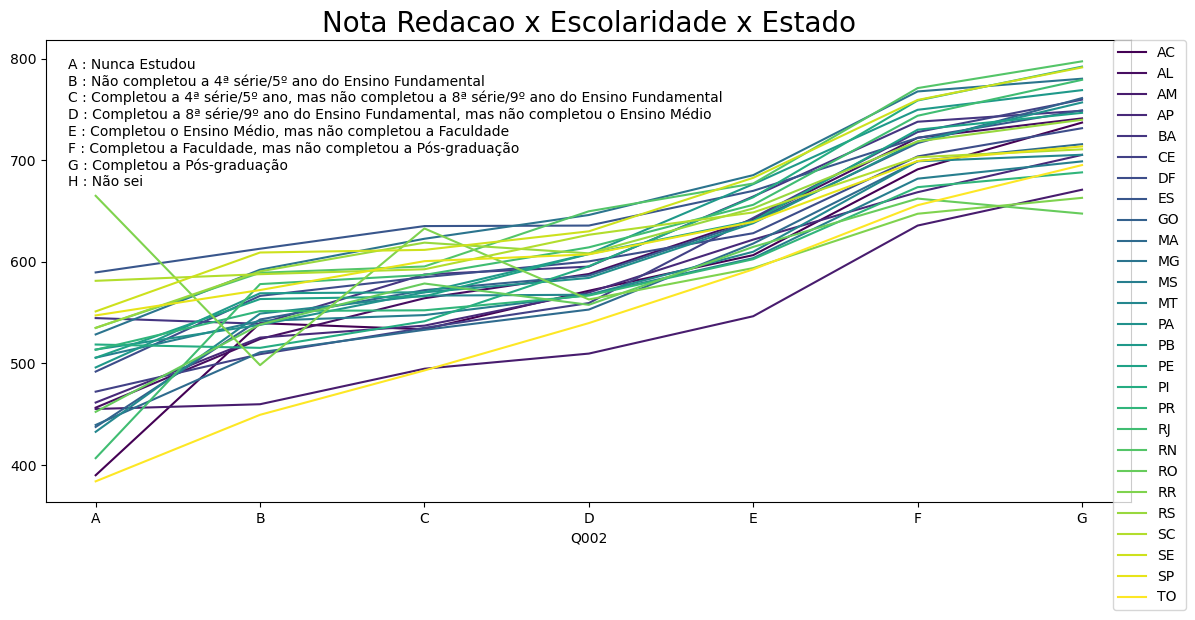

In [30]:
#Podemos fazer um gráfico relacionando a nota da redação pela escolaridade da mãe por estados. 
#Apesar das cores não poderem discrinar muito bem os estados, observa-se que a tendência geral se mantêm.

ax= df_familia.filter(items=['SG_UF_ESC','Q002', 'NU_NOTA_REDACAO'])\
        .where(df_familia.Q002 != 'H')\
        .groupby(['Q002','SG_UF_ESC'])\
        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
        .unstack().plot(figsize=(14,6), colormap='viridis')

ax.set_title('Nota Redacao x Escolaridade x Estado', fontsize =20)

handles, labels = ax.get_legend_handles_labels() #handles - ponteiros pra tratar camadas das figuras

import re # pacote de expressões regulares, para tratar textos 
#assim vamos tratar as informações da legenda.
#Sem este comando a legenda seria (NU_NOTA_REDACAO, UF)
#Este comando vai procurar as strings entre a vírgula espaço e parentees final. Mostrando apenas a sigla da UF na legenda.

edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0. ) 

texto_dicionario = ""
for key, value in dicionaria_1e2.items():
    texto_dicionario = texto_dicionario + "{k} : {v}\n".format(k=key, v=value)

ax.text(0.02,0.65, texto_dicionario, transform=ax.transAxes, fontsize=10);

#bbox={'boxstyle' : 'round', 'facecolor':'black', 'alpha':0.8} - Cria uma caixa para a legenda
#bbox to anchor [0,0 inferior esquerdo, 1,0 inferior direito, 1,1 superior direito
#loc referencia da caixa, pode ser numero ou palavra, tipo center. Mais infos, documentação matplotlib.axes.Axes.legend